- The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device          protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


## Data Cleaning 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [6]:
df.dropna(inplace=True )

In [7]:
df.drop(columns= 'customerID' , axis = 1 , inplace=True)

In [8]:
for i in df.columns:
    print(df.value_counts(df[i]))
    print('****************')

gender
Male      3549
Female    3483
dtype: int64
****************
SeniorCitizen
0    5890
1    1142
dtype: int64
****************
Partner
No     3639
Yes    3393
dtype: int64
****************
Dependents
No     4933
Yes    2099
dtype: int64
****************
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Length: 72, dtype: int64
****************
PhoneService
Yes    6352
No      680
dtype: int64
****************
MultipleLines
No                  3385
Yes                 2967
No phone service     680
dtype: int64
****************
InternetService
Fiber optic    3096
DSL            2416
No             1520
dtype: int64
****************
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
dtype: int64
****************
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
dtype: int64
****************
DeviceProtection
No                

In [9]:
df.describe(exclude='O').T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [10]:
df.describe(include='O').T

,count,unique,top,freq
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094
TechSupport,7032,3,No,3472


##### some insights 
 * we will impute the NAN values in colmuns 'TotalCharges' 
 * will make colmuns call  'No internet service'

In [11]:
df.columns = df.columns.str.lower() 
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [12]:
df['streamingmovies'].unique().shape == (3,)

True

In [13]:
df['streamingmovies'].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: streamingmovies, dtype: int64

In [14]:
unique_list =[]
for i in df.columns :
    if df[i].unique().shape == (3,) : 
        if (df[i].values=='No internet service').any() :
            unique_list.append(i)

     

In [15]:
for i in unique_list :
    df[i] = df[i].apply(lambda x : x.replace('No internet service', 'No'))  

In [16]:
df['No internet service'] = df['techsupport'].apply(lambda x : 'Yes' if 'No internet service' in x else 'No')

In [17]:
for i in unique_list : 
    print(i)
    print(df[i].value_counts())
    print('************************')

onlinesecurity
No     5017
Yes    2015
Name: onlinesecurity, dtype: int64
************************
onlinebackup
No     4607
Yes    2425
Name: onlinebackup, dtype: int64
************************
deviceprotection
No     4614
Yes    2418
Name: deviceprotection, dtype: int64
************************
techsupport
No     4992
Yes    2040
Name: techsupport, dtype: int64
************************
streamingtv
No     4329
Yes    2703
Name: streamingtv, dtype: int64
************************
streamingmovies
No     4301
Yes    2731
Name: streamingmovies, dtype: int64
************************


## EDA 

In [18]:
categrical_cols = df.select_dtypes(include='O').columns.to_list()
numirecal_cols = df.select_dtypes(exclude='O').columns.to_list()

In [19]:
categrical_cols

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn',
 'No internet service']

In [20]:
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<Axes: xlabel='seniorcitizen', ylabel='count'>

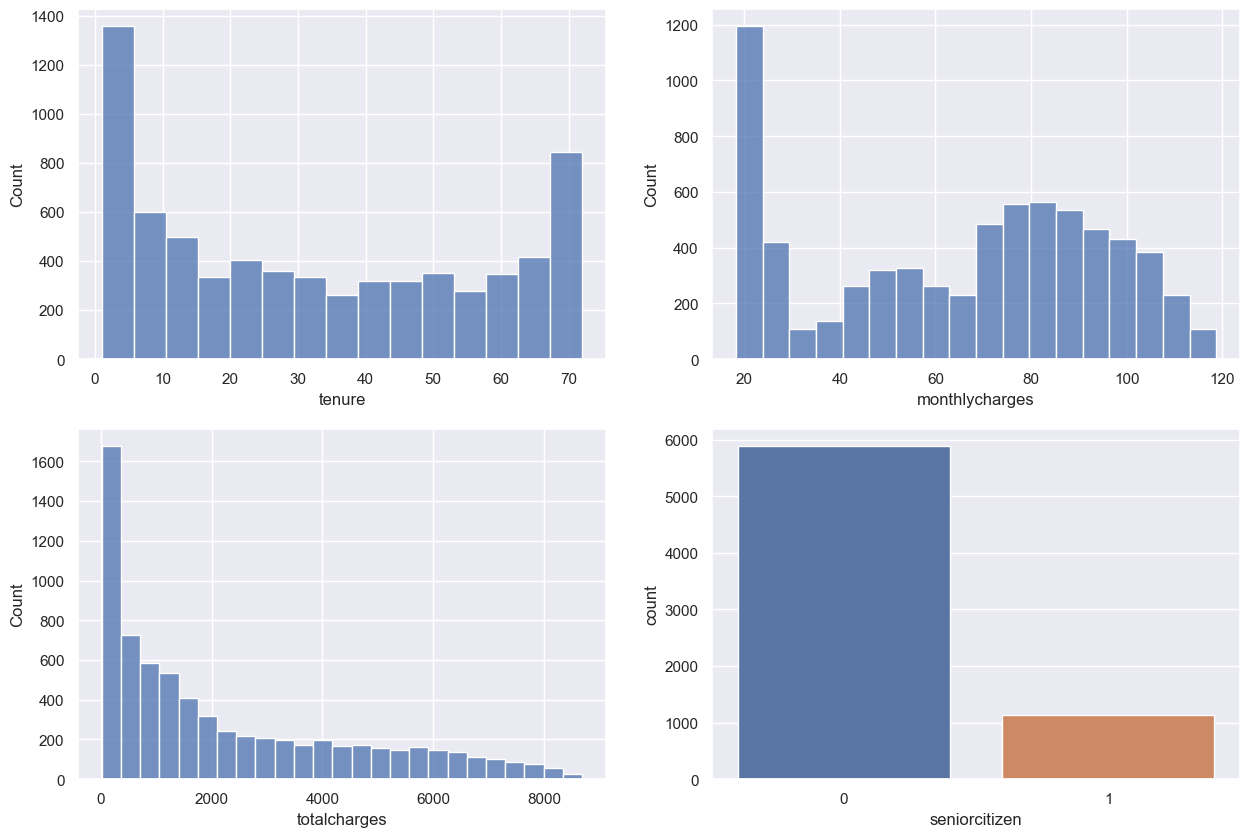

In [21]:
sns.set(style="darkgrid")
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(data=df , x = 'tenure' , ax=ax1)
sns.histplot(data = df , x = 'monthlycharges',ax=ax2)
sns.histplot(data = df , x = 'totalcharges',ax=ax3)
sns.countplot(data=df , x= 'seniorcitizen',ax=ax4 )


#### some insghits from the Drawing
-  as we see TotalChagres is skewed  
-  most people  is not retired based on the the colmun seniorcitizen 


In [22]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,No internet service
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No


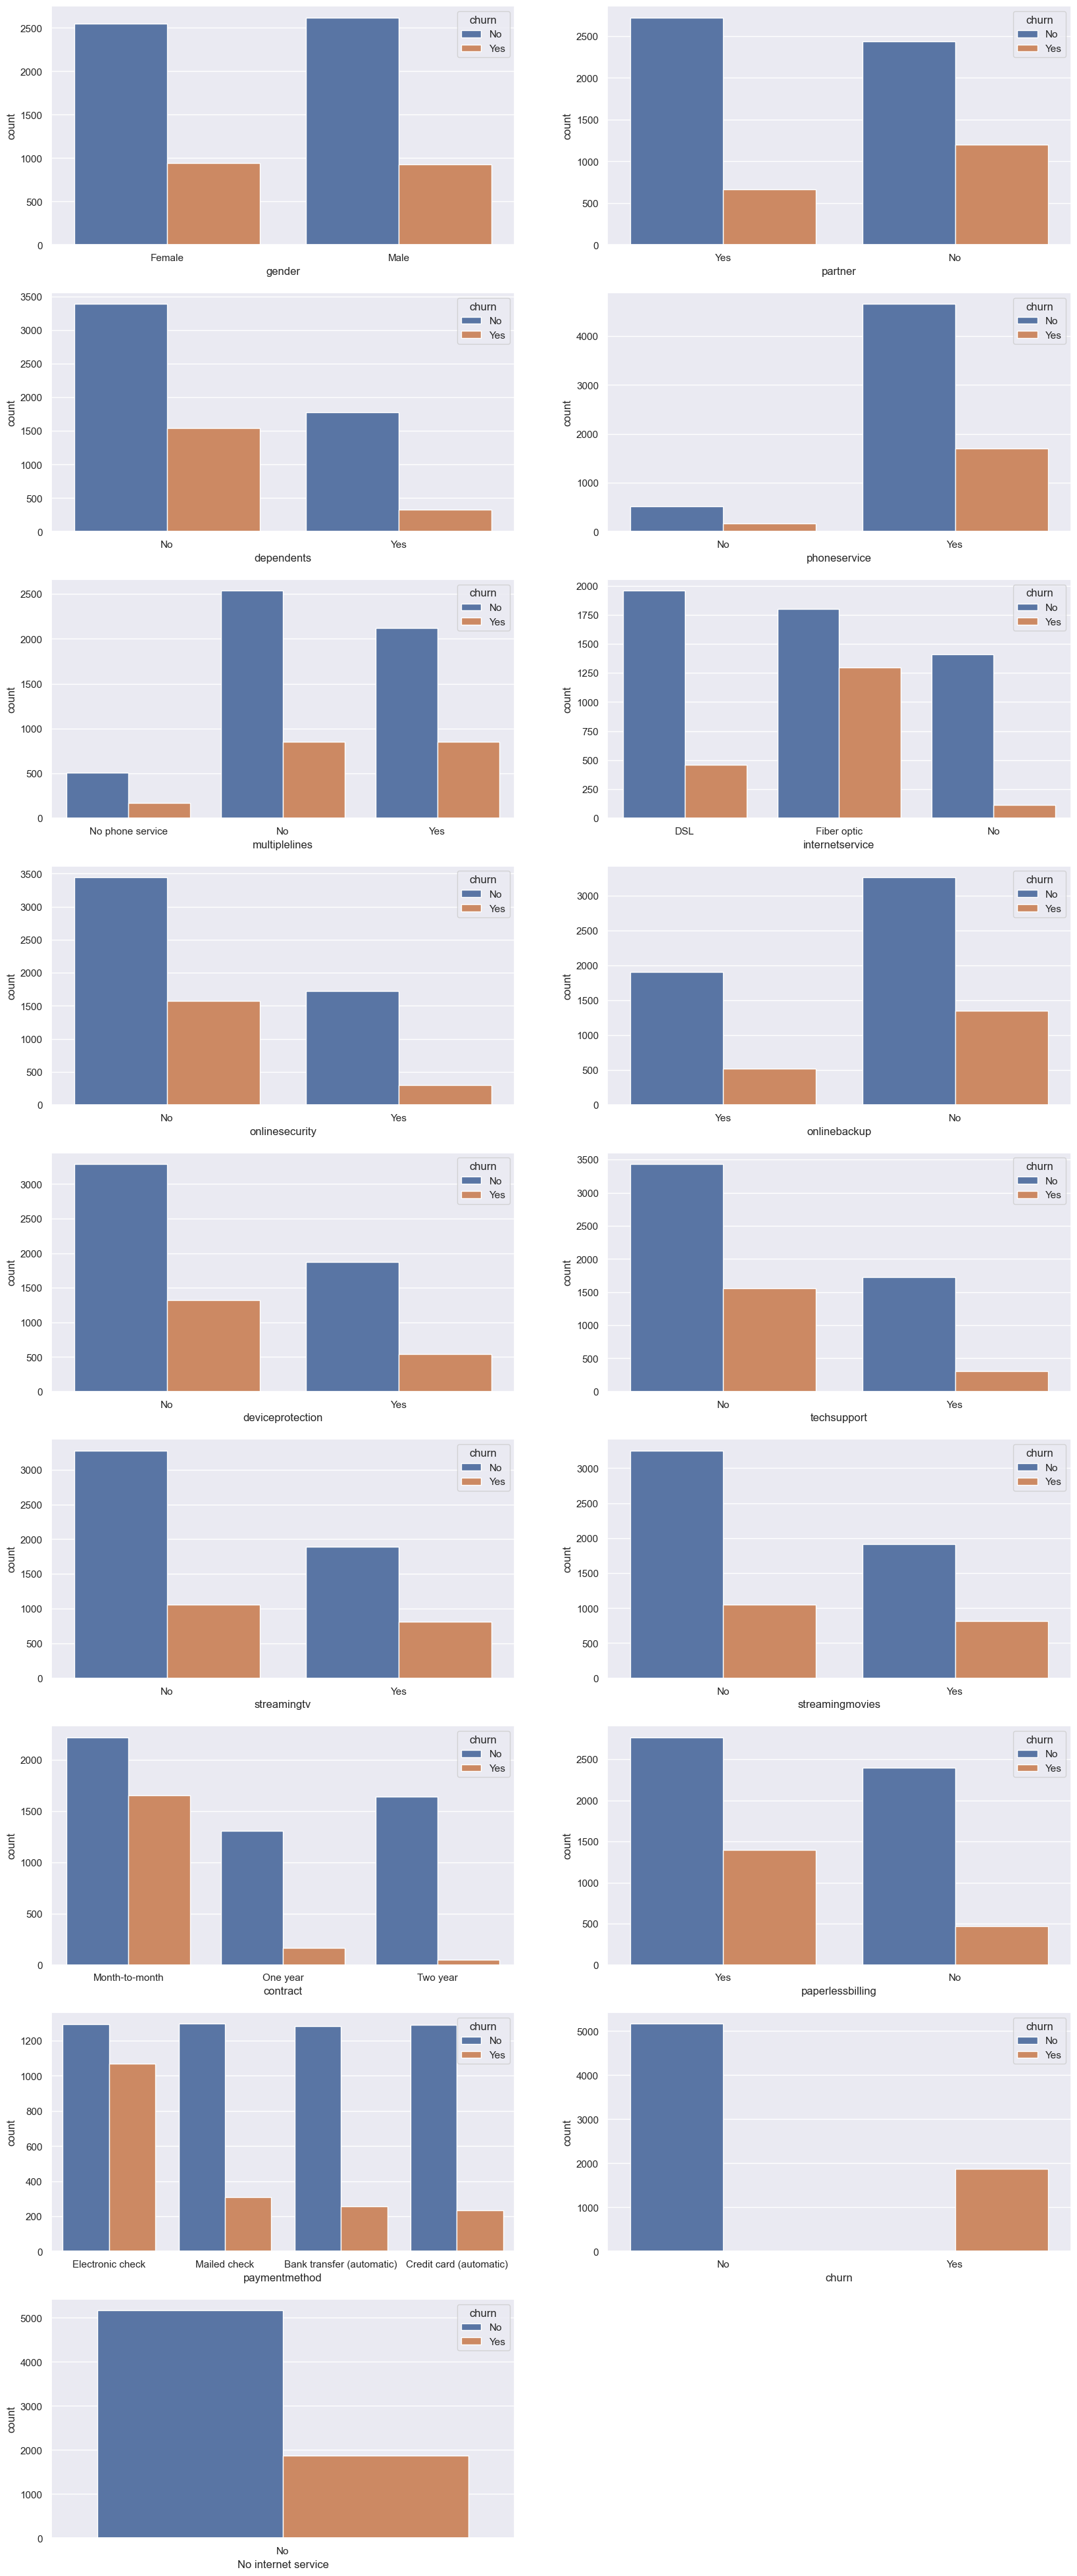

In [23]:
plt.figure(figsize = (20 , 50))
for i , col in enumerate(categrical_cols , 1) :
    plt.subplot((len(categrical_cols)//2+1) , 2 , i )
    sns.countplot(data=df , x=col , hue='churn'  )
    

Text(0.5, 1.0, 'Two Year Contract')

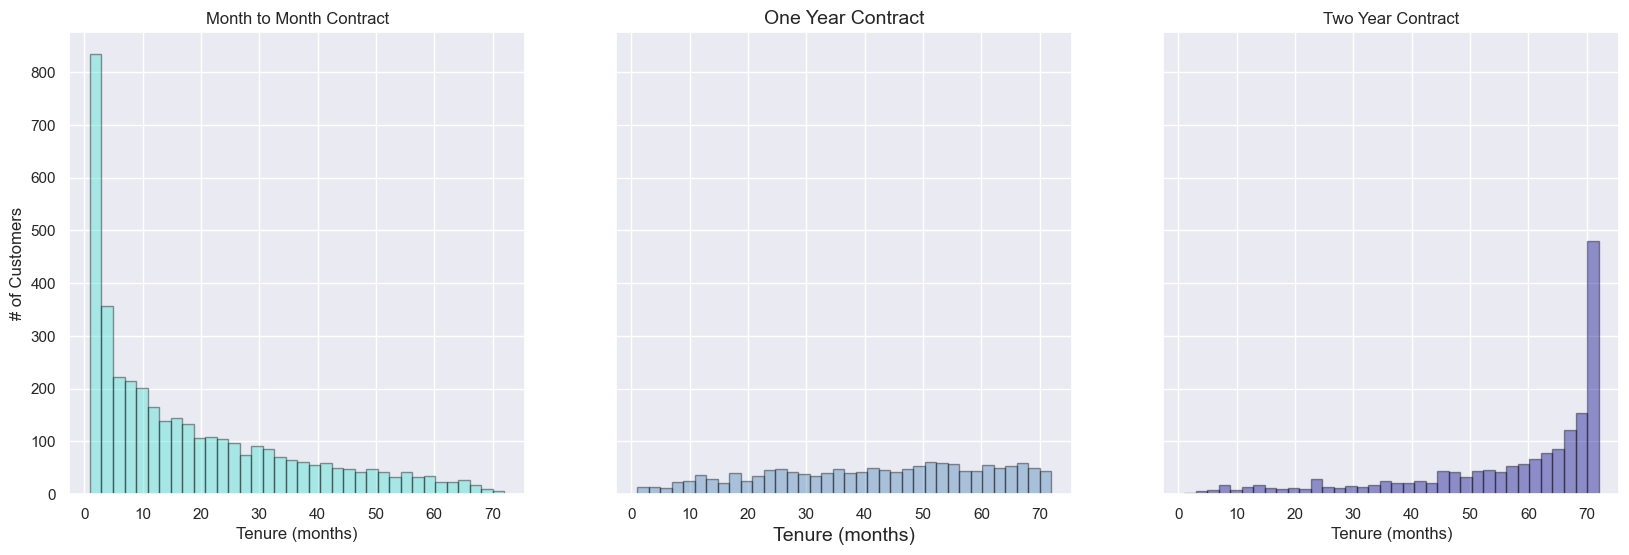

In [24]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract') 

 - Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

<Axes: xlabel='churn', ylabel='tenure'>

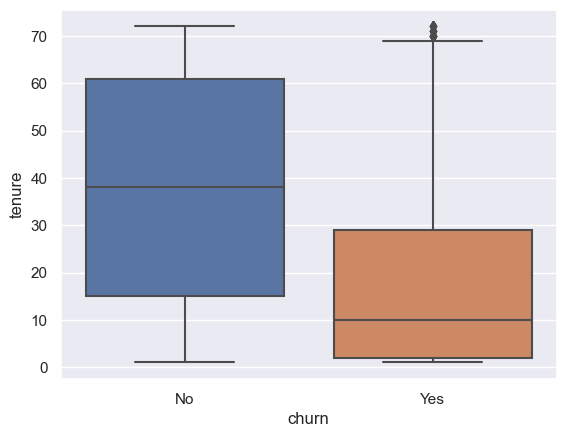

In [25]:
sns.boxplot(x = df.churn, y =df.tenure) 

- the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

<Axes: xlabel='monthlycharges', ylabel='totalcharges'>

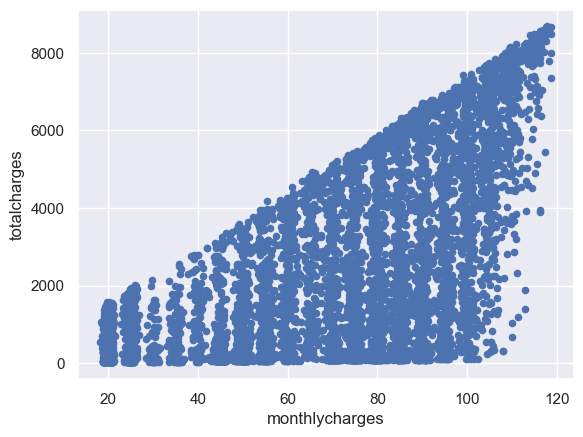

In [26]:
df[['monthlycharges', 'totalcharges']].plot.scatter(x = 'monthlycharges', y='totalcharges') 

 - We will observe that the total charges increases as the monthly bill for a customer increases

In [27]:
# making copy from the data 
df_clean1 = df.copy()

In [28]:
df_clean = df.copy()

In [29]:
df_clean1['churn'].replace(to_replace='Yes', value=1, inplace=True)
df_clean1['churn'].replace(to_replace='No',  value=0, inplace=True)
df_dummies =  pd.get_dummies(df_clean1)

<Axes: >

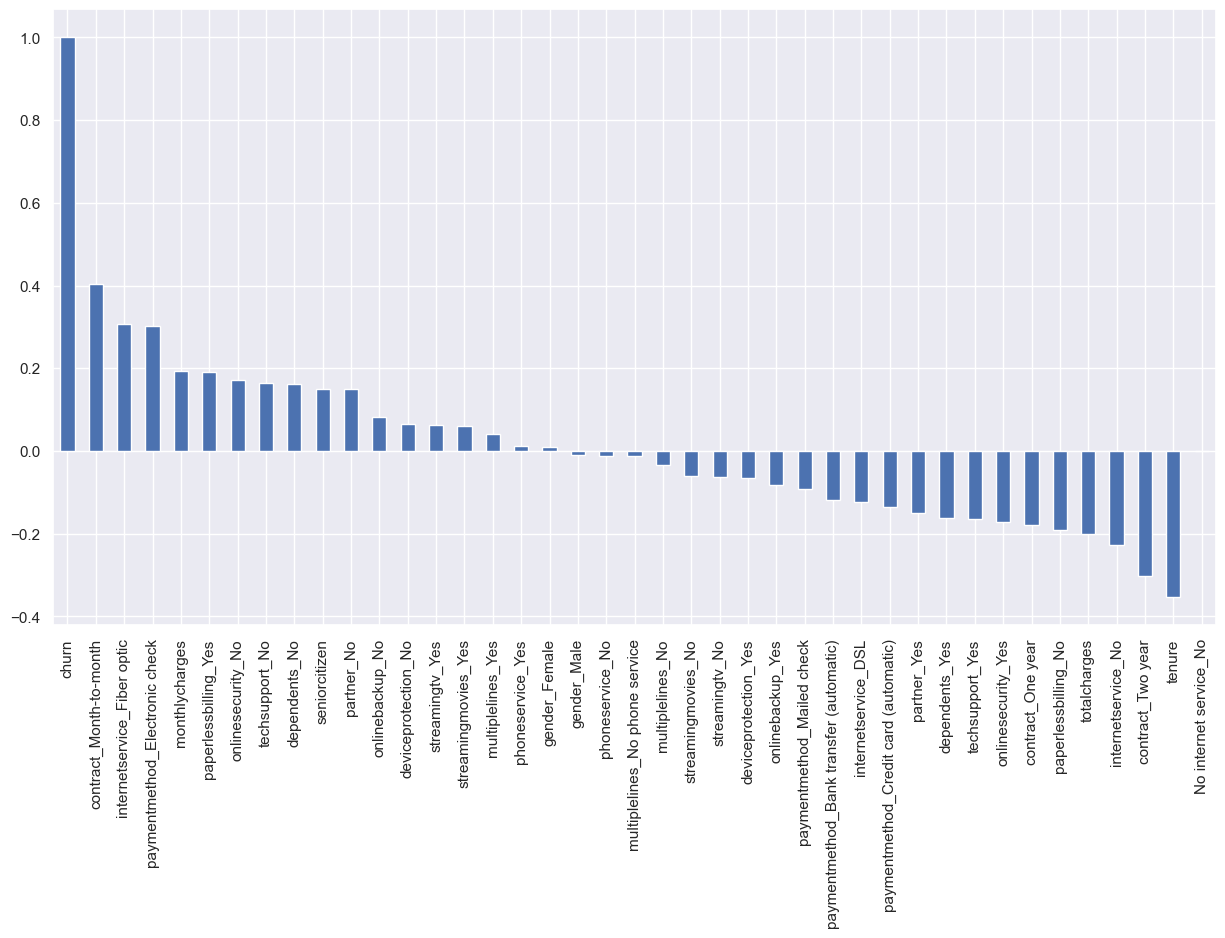

In [30]:
plt.figure(figsize=(15,8))
df_dummies.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

- Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.



## Data Preprocessing 

In [31]:
# spliting the x,y 
x = df_clean.drop('churn' , axis = 1 )
y = df_clean['churn']

In [32]:
from sklearn.model_selection import train_test_split 

# Splitting the dataset into the Train set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42 , stratify=y )


In [33]:
categrical_cols = x_train.select_dtypes(include="O").columns.tolist()
numirecal_cols = x_train.select_dtypes(exclude="O").columns.tolist()

In [34]:
numirecal_cols

['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges']

In [35]:
categrical_cols

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'No internet service']

In [36]:
from sklearn.preprocessing import RobustScaler , OneHotEncoder
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 

# Preprocessing for numerical data
numirecal_transformer = Pipeline(
    steps=[
    ('scaling' , RobustScaler())   
])

# Preprocessing for categorical data
categrical_trasformer = Pipeline(
    steps=[
    ('encoding' , OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data 
preprocesser =  ColumnTransformer(
    transformers=
    [
        ('num' , numirecal_transformer , numirecal_cols),
        ('cat', categrical_trasformer , categrical_cols)
    ]
)


In [37]:
x_train = preprocesser.fit_transform(x_train)
x_test = preprocesser.transform(x_test)

### KNeighborsClassifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors = 12) 
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy:",accuracy_knn)
print(classification_report(y_test, predicted_y))


KNN accuracy: 0.7782515991471215
              precision    recall  f1-score   support

          No       0.83      0.88      0.85      1033
         Yes       0.60      0.51      0.55       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



Text(0.5, 1.0, 'KNeighbors Classifier CONFUSION MATRIX ')

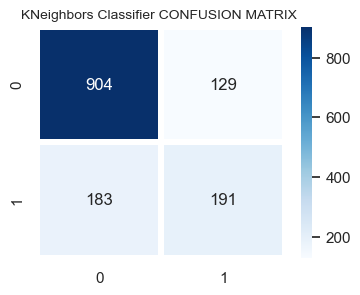

In [39]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predicted_y) , annot=True,fmt = "d",linecolor="w",linewidths=3,cmap = 'Blues' )
plt.title('KNeighbors Classifier CONFUSION MATRIX ' , fontsize = 10)

### SVC Model

In [40]:
from sklearn.svm import SVC

svc_model = SVC(random_state = 1)
svc_model.fit(x_train,y_train)
predict_y = svc_model.predict(x_test)
accuracy_svc = svc_model.score(x_test,y_test)
print("SVM accuracy is :",accuracy_svc)
print(classification_report(y_test, predict_y))

SVM accuracy is : 0.7896233120113717
              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1033
         Yes       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



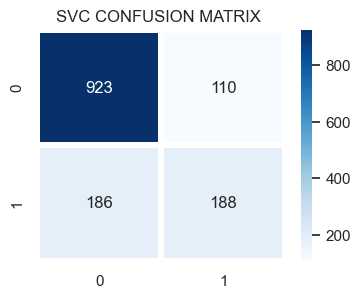

In [41]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predict_y),annot=True,fmt = "d",linecolor="w",linewidths=3,cmap = 'Blues' )
plt.title('SVC CONFUSION MATRIX ')
plt.show()

### RandomForest Classifier Model

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf =  RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(x_train, y_train)

# Make predictions
prediction_test = model_rf.predict(x_test)
print (metrics.accuracy_score(y_test, prediction_test))
print(classification_report(y_test, prediction_test))


0.7924662402274343
              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1033
         Yes       0.66      0.45      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



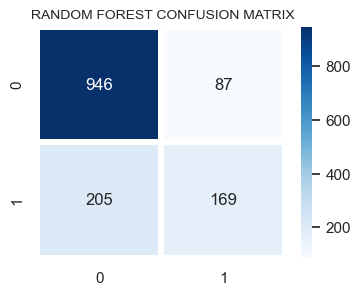

In [43]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="w",linewidths=3,cmap = 'Blues')
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=10)
plt.show()


- Random Forest Give us hight score right now 

### DecisionTreeClassifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
predictdt_y = dt_model.predict(x_test)
accuracy_dt = dt_model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7221037668798863


- DecisionTreeClassifier give us lower acc 

### AdaBoostClassifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier
a_model = AdaBoostClassifier()
a_model.fit(x_train,y_train)
a_preds = a_model.predict(x_test)
print(metrics.accuracy_score(y_test, a_preds))
print(classification_report(y_test, a_preds))

0.7917555081734187
              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1033
         Yes       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



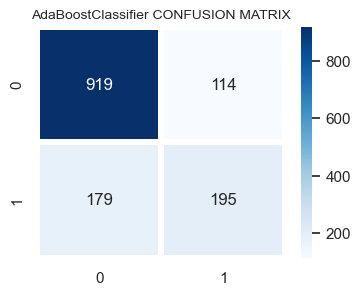

In [46]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test , a_preds) , annot=True,fmt = "d",linecolor="w",linewidths=3,cmap = 'Blues')
plt.title('AdaBoostClassifier CONFUSION MATRIX' , fontsize=10)
plt.show()

- the AdaBoost increase from numbers of the True Positive and decrease from the numbers of True Negative compared to the RandomForestClassifier bur the accuracy score almost equal 

### GradientBoostingClassifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=200, random_state=42)
grad.fit(x_train, y_train)
pred_grad = grad.predict(x_test)
print(metrics.accuracy_score(y_test,pred_grad ))
print(classification_report(y_test,pred_grad))

0.783226723525231
              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1033
         Yes       0.61      0.52      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



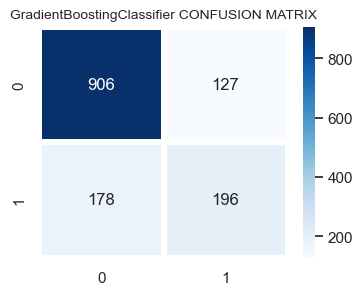

In [48]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,pred_grad) ,annot=True,fmt = "d",linecolor="w",linewidths=3,cmap = 'Blues')
plt.title('GradientBoostingClassifier CONFUSION MATRIX', fontsize=10)
plt.show()

In [49]:
from sklearn.ensemble import VotingClassifier
mod1 = GradientBoostingClassifier()
mod2 = RandomForestClassifier()
mod3 = AdaBoostClassifier()

final_mdel = VotingClassifier(estimators=[('grd', mod1 ), ('rf', mod2), ('ada', mod3)], voting='soft')

final_mdel.fit(x_train, y_train)
predictions = final_mdel.predict(x_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.7889125799573561


In [50]:
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1033
         Yes       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



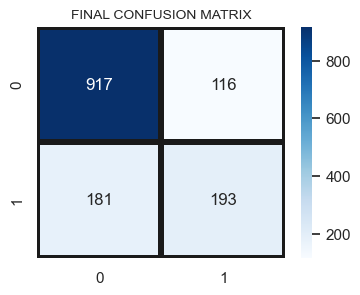

In [51]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3 , cmap ='Blues')
    
plt.title("FINAL CONFUSION MATRIX",fontsize=10)
plt.show()

- From the final CONFUSION MATRIX is the the total non-churn people is 1033 the model predicts 918 from them , while the total churn people is 374 the model predicts 195  

In [52]:
# Preprocessor Saving
import pickle
pickle.dump(preprocesser, open('preprocesser.pkl', 'wb'))

# Model Saving
pickle.dump(final_mdel, open('model.pkl', 'wb'))